In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from torch import nn

### MAH WAY

In [3]:
weight = 0.3
bias = 0.7

In [4]:
X = torch.rand(20)
y = 0.3 * X + bias

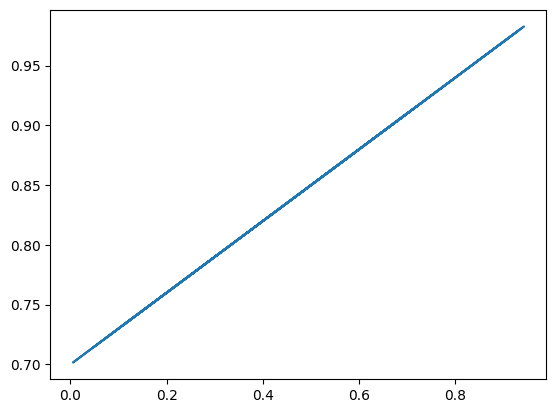

In [5]:
plt.plot(X, y)

### YAH WAY

In [6]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02)
y = weight * X + bias

([<matplotlib.lines.Line2D at 0x1cdc417d1c0>], 50, 50)

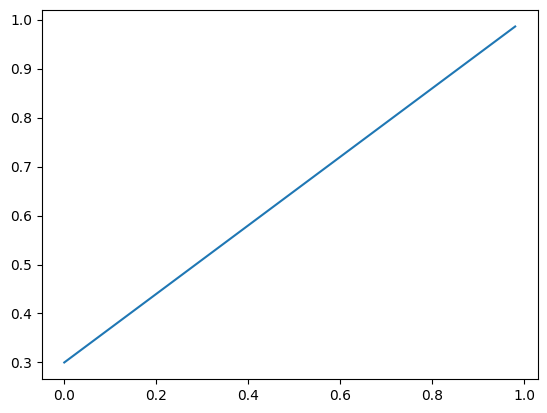

In [7]:
plt.plot(X, y), len(X), len(y)

In [8]:
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]

In [9]:
X_train, y_train, X_train.shape, y_train.shape

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
         0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
         0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
         0.8040, 0.8180, 0.8320, 0.8460]),
 torch.Size([40]),
 torch.Size([40]))

In [10]:
X_test, y_test, X_test.shape, y_test.shape

(tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]),
 tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
         0.9860]),
 torch.Size([10]),
 torch.Size([10]))

In [11]:
def plot_prediction(train_data = X_train, train_labels = y_train, 
                    test_data = X_test, test_labels = y_test, predictions = None):
    plt.figure(figsize=(5, 3))
    plt.scatter(train_data, train_labels, c='b', label='Train', s=8)
    plt.scatter(test_data, test_labels, c='g', label='Test', s=8)
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label = 'Predictions', s=8)
    plt.legend(prop={'size':7})

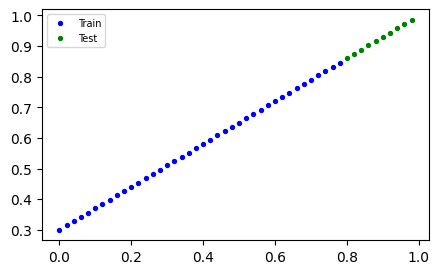

In [12]:
plot_prediction(train_data= X_train, train_labels=y_train, 
                test_data=X_test, test_labels=y_test)

In [13]:
class linear_regression_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad = True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, 
                                              requires_grad=True,
                                              dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### MAKE DAH MODEL

In [14]:
torch.manual_seed(42)

model_0 = linear_regression_model()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
[model_0.weights, model_0.bias]

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
model_0.forward(X_test)

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588], grad_fn=<AddBackward0>)

In [18]:
## inference_mode drops the gradient tracking...
with torch.inference_mode():
    y_preds = model_0(X_test)

In [19]:
y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

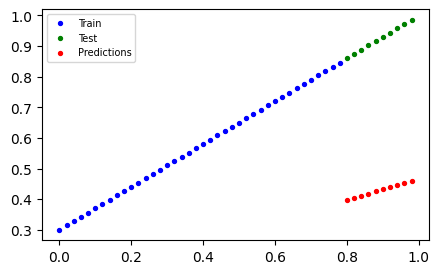

In [20]:
plot_prediction(train_data=X_train, 
                train_labels=y_train, 
                test_data=X_test,
                test_labels=y_test,
                predictions=y_preds)

In [21]:
model_0(X_test)

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588], grad_fn=<AddBackward0>)

In [22]:
y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

In [23]:
sum(y_preds - y_test)/len(y_test)

tensor(-0.4945)

In [24]:
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), 
                            lr = 0.01)

### TRAIN and TEST DAT USING LOOOOP

In [25]:
# epochs = 1

# for epoch in range(epochs):
#     model_0.train()  #--> sets all parameter that require gradient to require gradient ..

#     y_pred = model_0(X_train) ## forward prop
#     loss = loss_func(y_pred, y_train) ## get the loss
#     optimizer.zero_grad() ## optimize this shit.. whatever this is idk
#     loss.backward()
#     optimizer.step() ##-> this performs gradient descent ??
    
#     model_0.eval()  #--> this turns off gradient tracking .. this is a test step.

# epoch_count = []
# train_loss_value = []
# test_loss_value = []

# epochs = 1
# for epoch in range(epochs):
#     ##test below and train above
#     model_0.eval()
#     with torch.inference_mode():
#         y_preds = model_0(X_test)
#     test_loss = loss_func(y_preds, y_test)

In [26]:
epoch_count = []
train_loss_value = []
test_loss_value = []

epochs = 180

for epoch in range(epochs+1):
    model_0.train()  #--> sets all parameter that require gradient to require gradient ..

    train_preds = model_0(X_train) ## forward prop
    train_loss = loss_func(train_preds, y_train) ## get the loss
    optimizer.zero_grad() ## optimize this shit.. whatever this is idk
    train_loss.backward()
    optimizer.step() ##-> this performs gradient descent ??
    
    ##test below and train above
    model_0.eval()  #--> this turns off gradient tracking .. this is a test step.
    with torch.inference_mode():
        y_preds = model_0(X_test)
    test_loss = loss_func(y_preds, y_test)

    if epoch%10==0:
        epoch_count.append(epoch)
        train_loss_value.append(train_loss.detach().numpy())
        test_loss_value.append(test_loss.detach().numpy())
        print(f"epoch : {epoch} | Train MAE : {train_loss} | Test Mode : {test_loss}")

epoch : 0 | Train MAE : 0.31288138031959534 | Test Mode : 0.48106518387794495
epoch : 10 | Train MAE : 0.1976713240146637 | Test Mode : 0.3463551998138428
epoch : 20 | Train MAE : 0.08908725529909134 | Test Mode : 0.21729660034179688
epoch : 30 | Train MAE : 0.053148526698350906 | Test Mode : 0.14464017748832703
epoch : 40 | Train MAE : 0.04543796554207802 | Test Mode : 0.11360953003168106
epoch : 50 | Train MAE : 0.04167863354086876 | Test Mode : 0.09919948130846024
epoch : 60 | Train MAE : 0.03818932920694351 | Test Mode : 0.08886633068323135
epoch : 70 | Train MAE : 0.03476089984178543 | Test Mode : 0.0805937647819519
epoch : 80 | Train MAE : 0.03132382780313492 | Test Mode : 0.07232122868299484
epoch : 90 | Train MAE : 0.02788739837706089 | Test Mode : 0.06473556160926819
epoch : 100 | Train MAE : 0.024458957836031914 | Test Mode : 0.05646304413676262
epoch : 110 | Train MAE : 0.021020207554101944 | Test Mode : 0.04819049686193466
epoch : 120 | Train MAE : 0.01758546568453312 | Tes

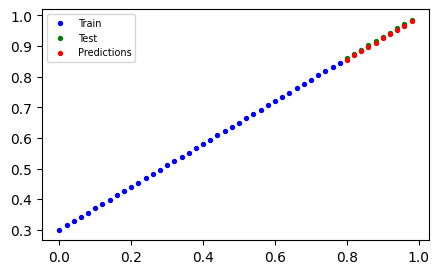

In [27]:
plot_prediction(predictions=y_preds)

In [29]:
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_0.state_dict(), MODEL_SAVE_PATH)
# model_0.save(MODEL_SAVE_PATH)

In [35]:
## model was saved in a state_dict(), so to load from state_dict() we use --
loaded_model_0 = linear_regression_model()
loaded_model_0.load_state_dict(torch.load('models/01_workflow_model_0.pth', weights_only=True))

<All keys matched successfully>

In [36]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [38]:
with torch.inference_mode():
    loaded_y_preds = loaded_model_0(X_test)

loaded_y_preds == y_preds    

tensor([True, True, True, True, True, True, True, True, True, True])

## ALL TOGETHER

In [56]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path

In [57]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [58]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

In [59]:
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]

In [60]:
def plot_prediction(train_data = X_train, train_labels = y_train, 
                    test_data = X_test, test_labels = y_test, predictions = None):
    plt.figure(figsize=(5, 3))
    plt.scatter(train_data, train_labels, c='b', label='Train', s=8)
    plt.scatter(test_data, test_labels, c='g', label='Test', s=8)
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label = 'Predictions', s=8)
    plt.legend(prop={'size':7})

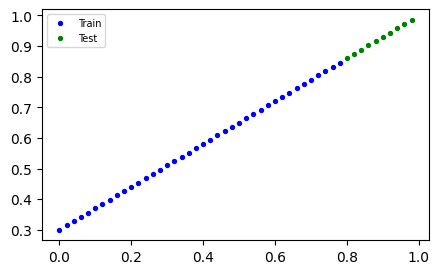

In [61]:
plot_prediction()

In [62]:
class linear_regression_with_Linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer1 = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer1(x)

torch.manual_seed(42)
model_1 = linear_regression_with_Linear()
model_1, model_1.state_dict()

(linear_regression_with_Linear(
   (linear_layer1): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer1.weight', tensor([[0.7645]])),
              ('linear_layer1.bias', tensor([0.8300]))]))

In [63]:
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [64]:
epochs = 200

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
model_1.to(device)

train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_1.train()
    train_preds = model_1(X_train)
    train_loss = loss_func(train_preds, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_preds = model_1(X_test)
    test_loss = loss_func(test_preds, X_test)

    if epoch%20 == 0:
        print(f"Epoch : {epoch} | train_loss: {train_loss} | test_loss: {test_loss}")

Epoch : 0 | train_loss: 0.5551779270172119 | test_loss: 0.6069762706756592
Epoch : 20 | train_loss: 0.3247582018375397 | test_loss: 0.3375565707683563
Epoch : 40 | train_loss: 0.09433845430612564 | test_loss: 0.06813690066337585
Epoch : 60 | train_loss: 0.0199567973613739 | test_loss: 0.021817976608872414
Epoch : 80 | train_loss: 0.01308917161077261 | test_loss: 0.01817154325544834
Epoch : 100 | train_loss: 0.0062156799249351025 | test_loss: 0.021886223927140236
Epoch : 120 | train_loss: 0.0012645035749301314 | test_loss: 0.02134581282734871
Epoch : 140 | train_loss: 0.0012645035749301314 | test_loss: 0.02134581282734871
Epoch : 160 | train_loss: 0.0012645035749301314 | test_loss: 0.02134581282734871
Epoch : 180 | train_loss: 0.0012645035749301314 | test_loss: 0.02134581282734871


In [65]:
list(model_1.parameters())

[Parameter containing:
 tensor([[0.6968]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.3025], device='cuda:0', requires_grad=True)]

In [66]:
model_1.eval()
with torch.inference_mode():
    test_preds = model_1(X_test)

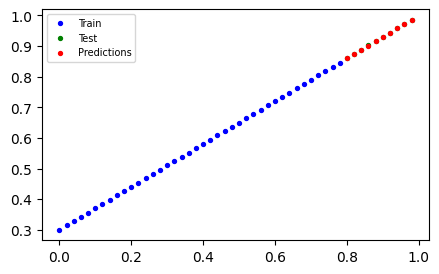

In [67]:
plot_prediction(predictions=test_preds.to('cpu').detach().numpy())

In [68]:
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_1.state_dict(), MODEL_SAVE_PATH)
# model_1.save(MODEL_SAVE_PATH)

In [69]:
## model was saved in a state_dict(), so to load from state_dict() we use --
loaded_model_1 = linear_regression_with_Linear()
loaded_model_1.load_state_dict(torch.load('models/01_workflow_model_1.pth', weights_only=True))
loaded_model_1.to((device))

linear_regression_with_Linear(
  (linear_layer1): Linear(in_features=1, out_features=1, bias=True)
)

In [70]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer1.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer1.bias', tensor([0.3025], device='cuda:0'))])

In [71]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_1(X_test)

In [72]:
loaded_model_preds == test_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')